## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.23.zip"


### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.23'

## Extracting metadata

In [3]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Text Files 09.15.22'
spectra_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Spectra 09.15.22/09.15.22 NE Part 2 Spectra'

# Find files


# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext_meta='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta


['NE 1.txt',
 'NE 10.txt',
 'NE 11.txt',
 'NE 12.txt',
 'NE 13.txt',
 'NE 14.txt',
 'NE 15.txt',
 'NE 16.txt',
 'NE 17.txt',
 'NE 18.txt',
 'NE 19.txt',
 'NE 2.txt',
 'NE 20.txt',
 'NE 21.txt',
 'NE 22.txt',
 'NE 23.txt',
 'NE 24.txt',
 'NE 25.txt',
 'NE 26.txt',
 'NE 27.txt',
 'NE 28.txt',
 'NE 29.txt',
 'NE 3.txt',
 'NE 30.txt',
 'NE 31.txt',
 'NE 32.txt',
 'NE 33.txt',
 'NE 34.txt',
 'NE 35.txt',
 'NE 36.txt',
 'NE 37.txt',
 'NE 38.txt',
 'NE 39.txt',
 'NE 4.txt',
 'NE 40.txt',
 'NE 41.txt',
 'NE 42.txt',
 'NE 43.txt',
 'NE 44.txt',
 'NE 45.txt',
 'NE 46.txt',
 'NE 47.txt',
 'NE 48.txt',
 'NE 49.txt',
 'NE 5.txt',
 'NE 50.txt',
 'NE 51.txt',
 'NE 52.txt',
 'NE 53.txt',
 'NE 54.txt',
 'NE 55.txt',
 'NE 56.txt',
 'NE 57.txt',
 'NE 58.txt',
 'NE 59.txt',
 'NE 6.txt',
 'NE 7.txt',
 'NE 8.txt',
 'NE 9.txt']

In [4]:
## Image file says Video Image

In [5]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, prefix=False, trupower=True)
meta.head()

100%|█████████████████████████████████████████| 59/59 [00:00<00:00, 1806.94it/s]

Done


filename                  date  power (mW)  Int_time (s)  accumulations  \
0   NE 1.txt  September 15, 2022\n       4.993          45.0            3.0   
11  NE 2.txt  September 15, 2022\n       4.992          45.0            3.0   
22  NE 3.txt  September 15, 2022\n       4.991          45.0            3.0   
33  NE 4.txt  September 15, 2022\n       4.990          45.0            3.0   
44  NE 5.txt  September 15, 2022\n       4.996          45.0            3.0   

    Mag (X)             duration      24hr_time  sec since midnight  \
0      50.0  ['0h', '2m', '17s']  11:14:52 AM\n             40492.0   
11     50.0  ['0h', '2m', '17s']  11:22:46 AM\n             40966.0   
22     50.0  ['0h', '2m', '17s']  11:30:38 AM\n             41438.0   
33    100.0  ['0h', '2m', '17s']  11:37:41 AM\n             41861.0   
44    100.0  ['0h', '2m', '17s']  11:48:29 AM\n             42509.0   

    Spectral Center  index  
0          1324.929      0  
11         1324.929     11  
22         1324.929     22  
33         1324.929     33  
44         1324.929     44

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [6]:
wavelength =532.067 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

Raman_shift (cm-1)  Intensity  Ne emission line in air
1           817.957694     5000.0                556.27662
9          1116.345158     5000.0                565.66588
16         1309.738376     5000.0                571.92248
19         1398.173304     5000.0                574.82985
23         1446.822793     7000.0                576.44188

## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [7]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=line_1, line2_shift=line_2,
                                     cut_off_intensity=2000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  330.477634  1116.345158  1446.822793                1117   

   Entered Pos Line 2  
0                1447

## Find your Ne spectra files

In [8]:
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [9]:
Ne_files

['063 NE 32.txt',
 '067 NE 34.txt',
 '069 NE 35.txt',
 '071 NE 36.txt',
 '073 NE 37.txt',
 '075 NE 38.txt',
 '077 NE 39.txt',
 '079 NE 40.txt',
 '080 NE 41.txt',
 '082 NE 42.txt',
 '084 NE 43.txt',
 '086 NE 44.txt',
 '088 NE 45.txt',
 '090 NE 46.txt',
 '092 NE 47.txt',
 '094 NE 48.txt',
 '096 NE 49.txt',
 '098 NE 50.txt',
 '100 NE 51.txt',
 '102 NE 52.txt',
 '104 NE 53.txt',
 '106 NE 54.txt',
 '108 NE 55.txt',
 '110 NE 56.txt',
 '112 NE 57.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [10]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


pos        height
49  1447.878781  20739.000000
44  1399.406110   6073.000000
58  1567.514917   4498.333496
10  1118.069988   2525.333252
24  1220.505213   1873.666626
31  1311.278432   1690.333374

selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


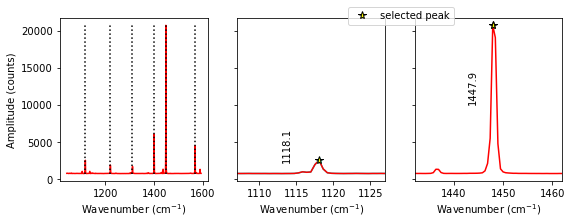

In [11]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=line_1 # approximate position of the 1st line you are interested in
peak2_cent=line_2 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [12]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [13]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=40, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=40, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  error_pk2  \
0       NE    1448.118645   28726.474069   0.235726   0.235726    0.00315   

   pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1     deltaNe  \
0    1117.923198    2520.819753   0.274651   0.274651        NaN  330.195446   

    Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  1.000855          NaN          NaN    109.381491     22.248584   

   residual_pk1+pk2  
0        131.630074

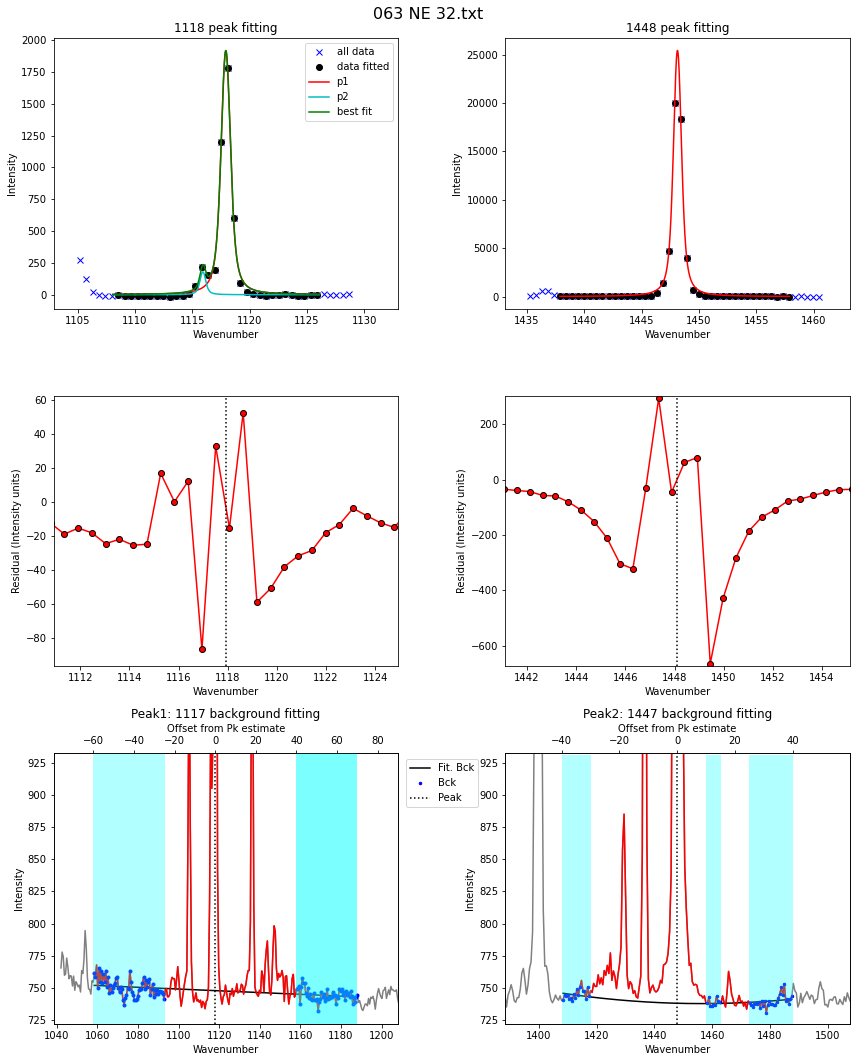

In [14]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [15]:
len(Ne_files)

25

 80%|██████████████████████████████████▍        | 20/25 [00:14<00:03,  1.32it/s]/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/ne_lines.py:916: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here
100%|███████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]


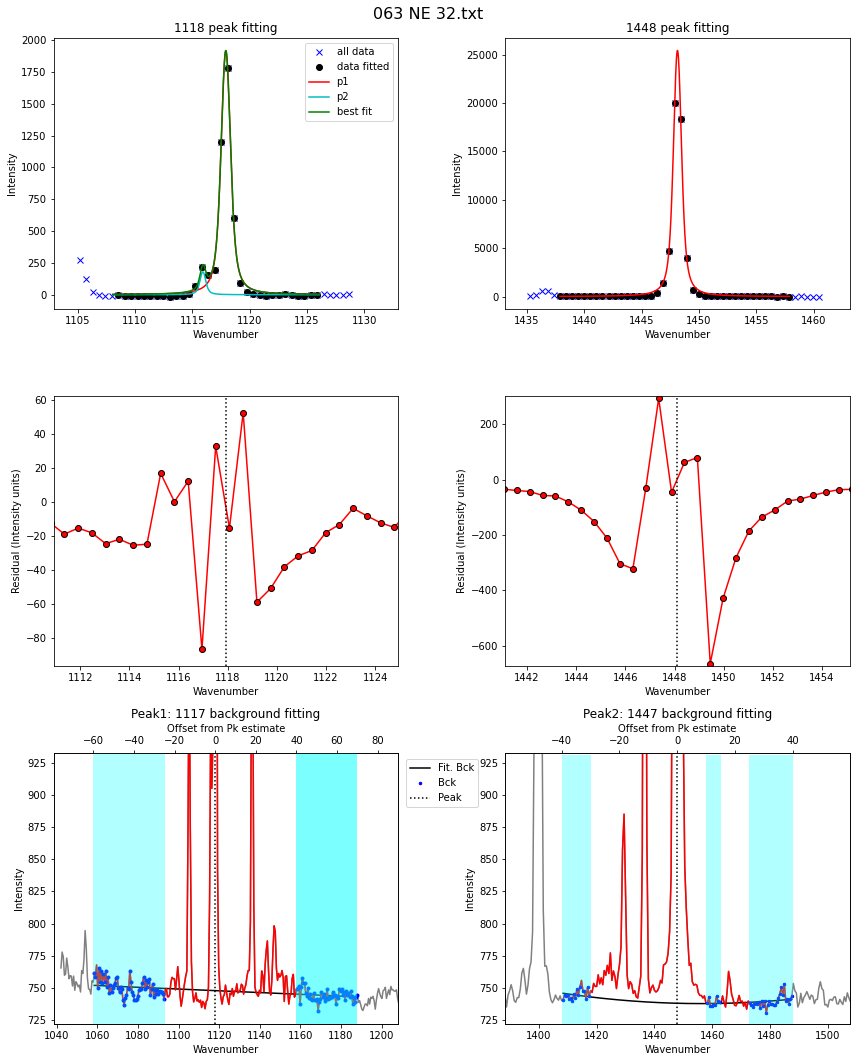

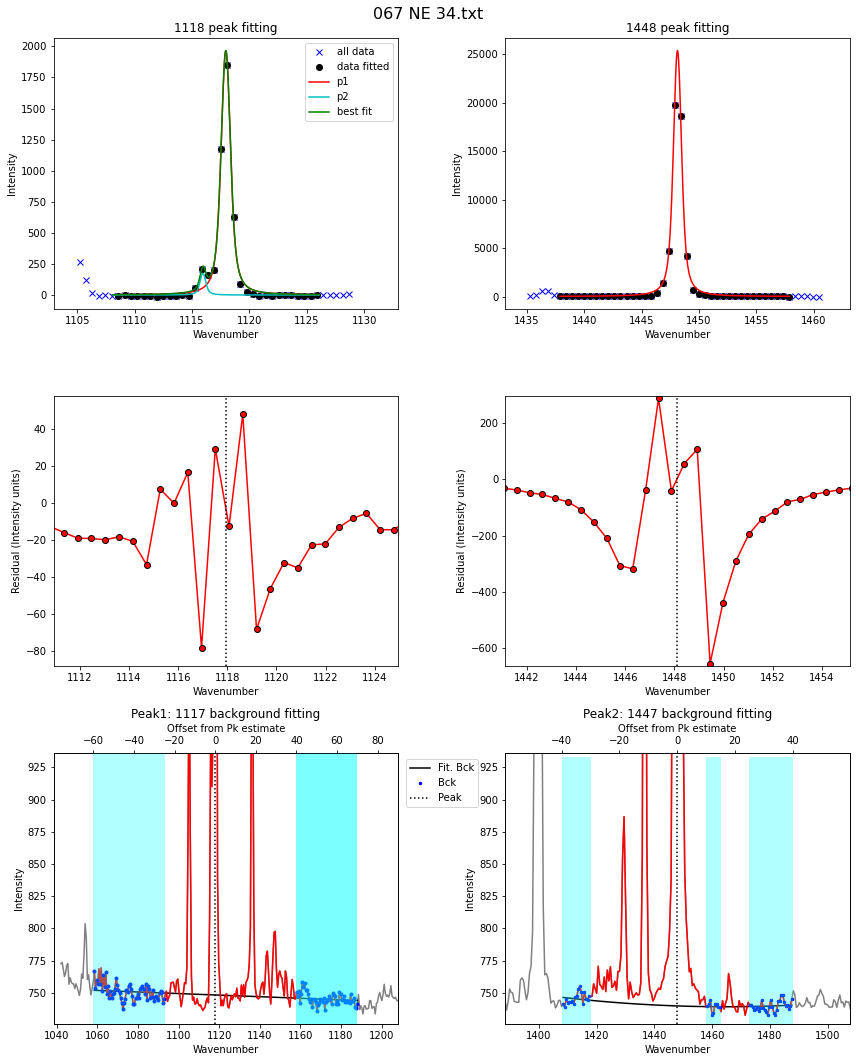

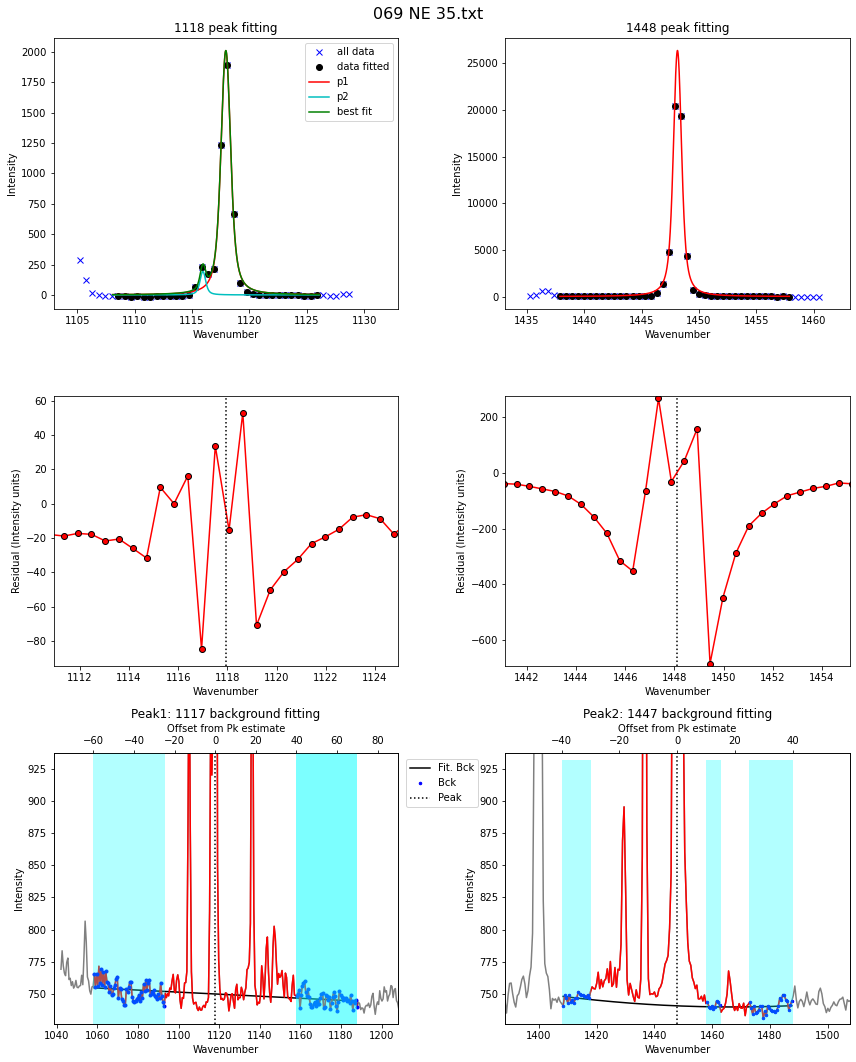

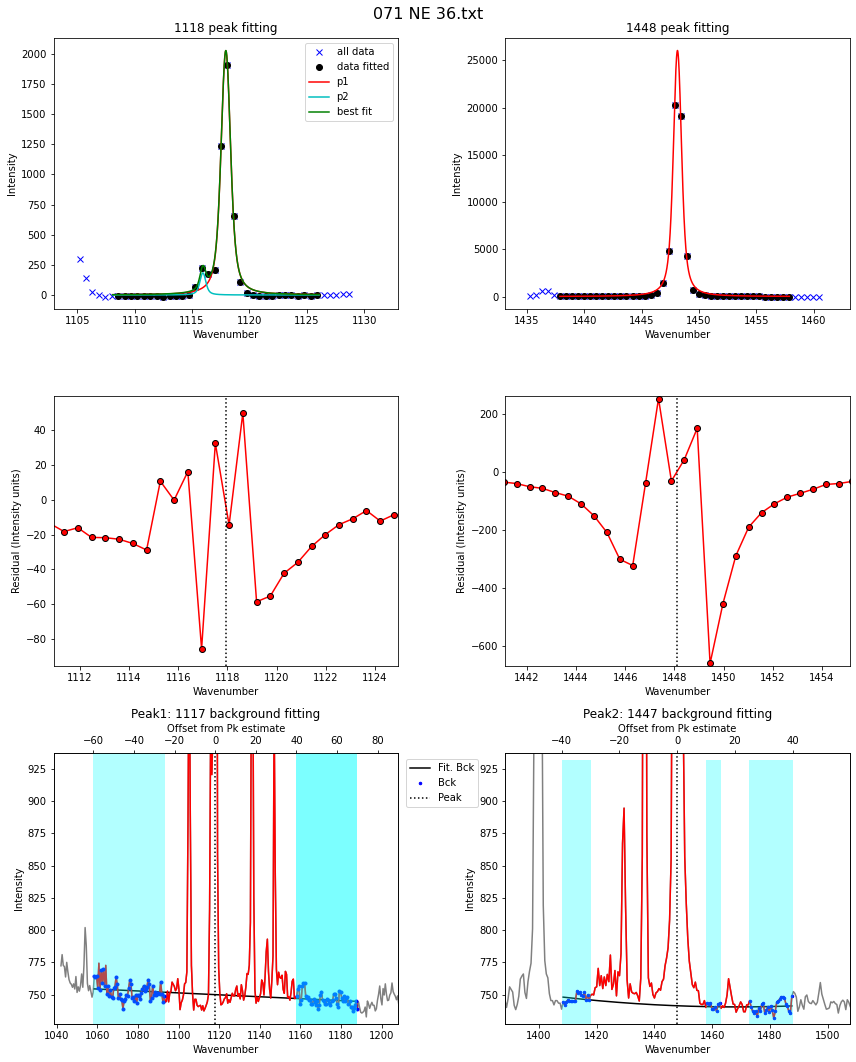

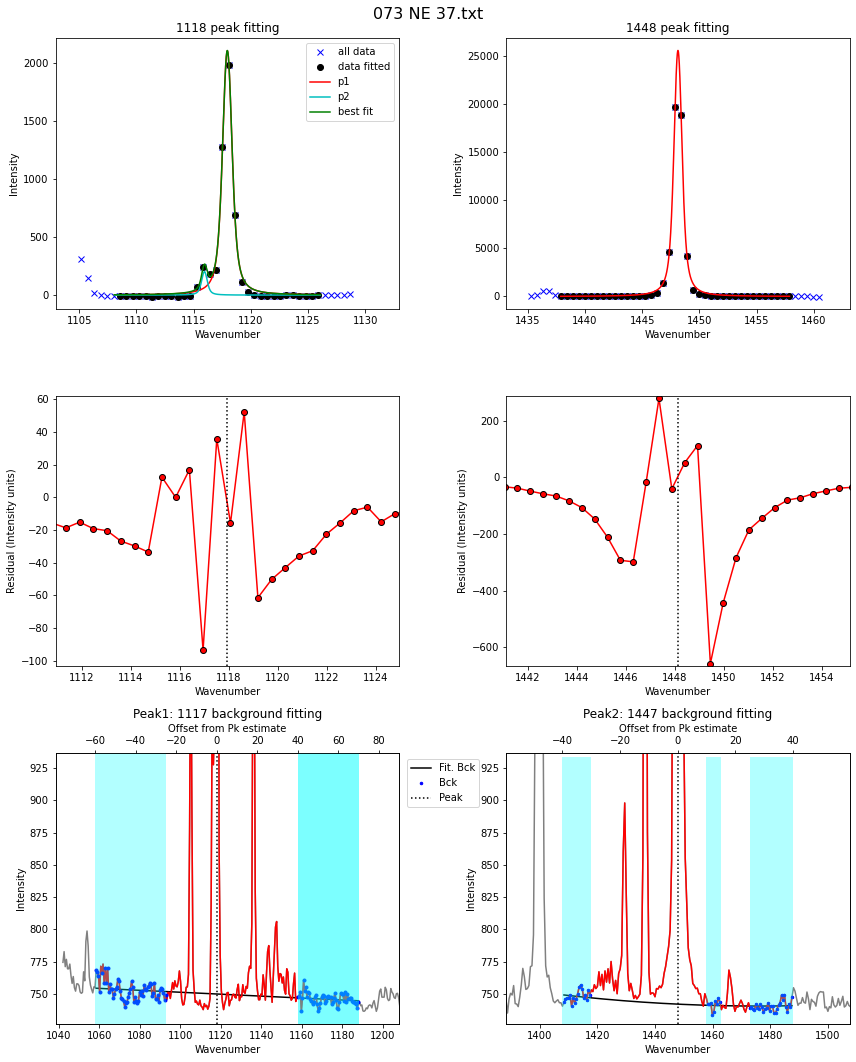

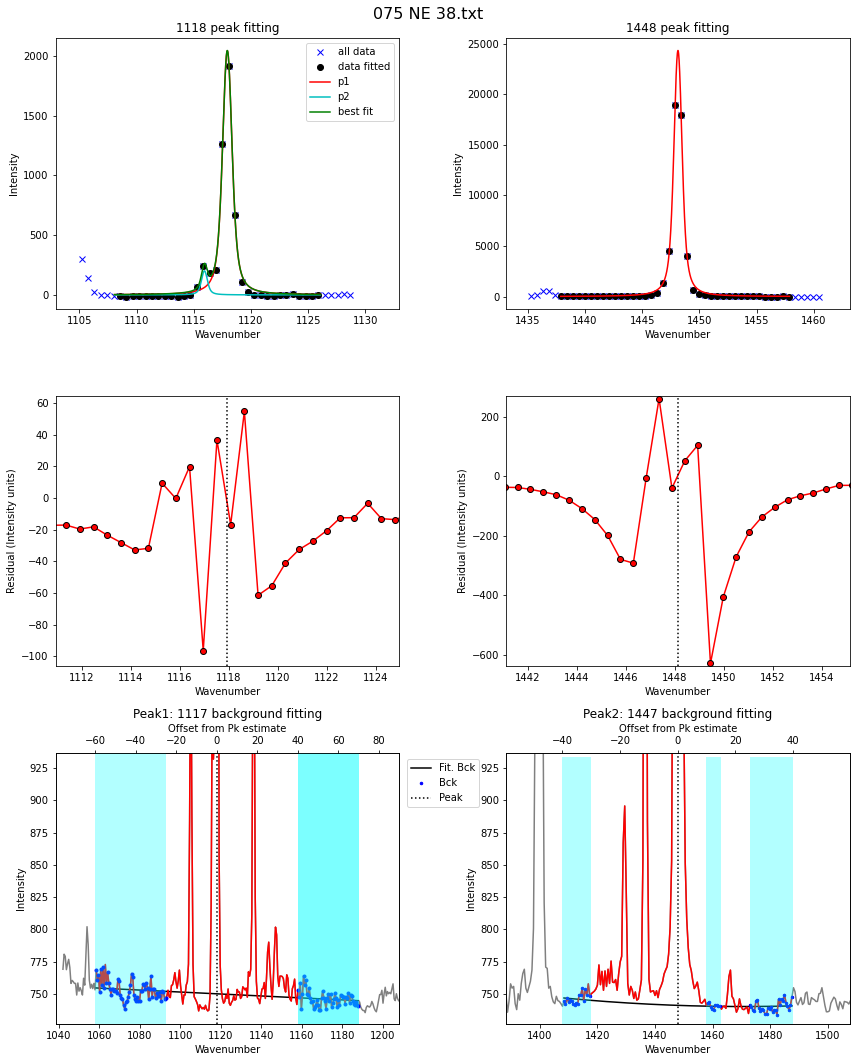

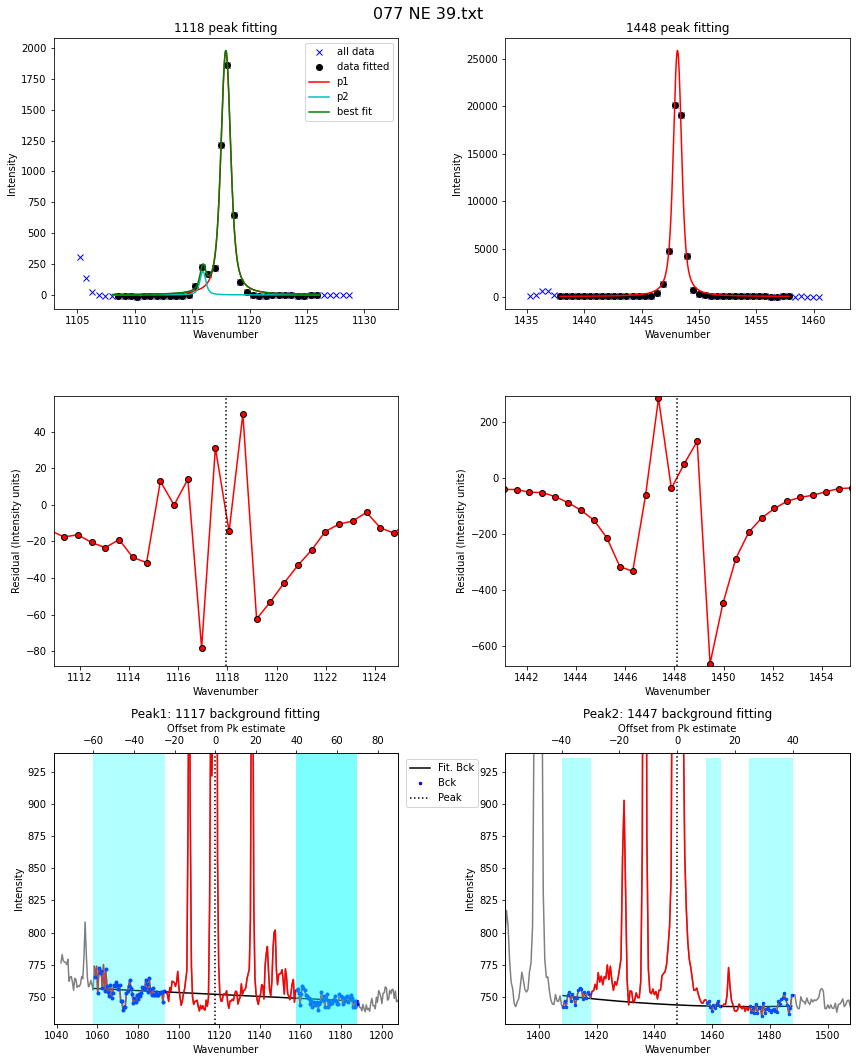

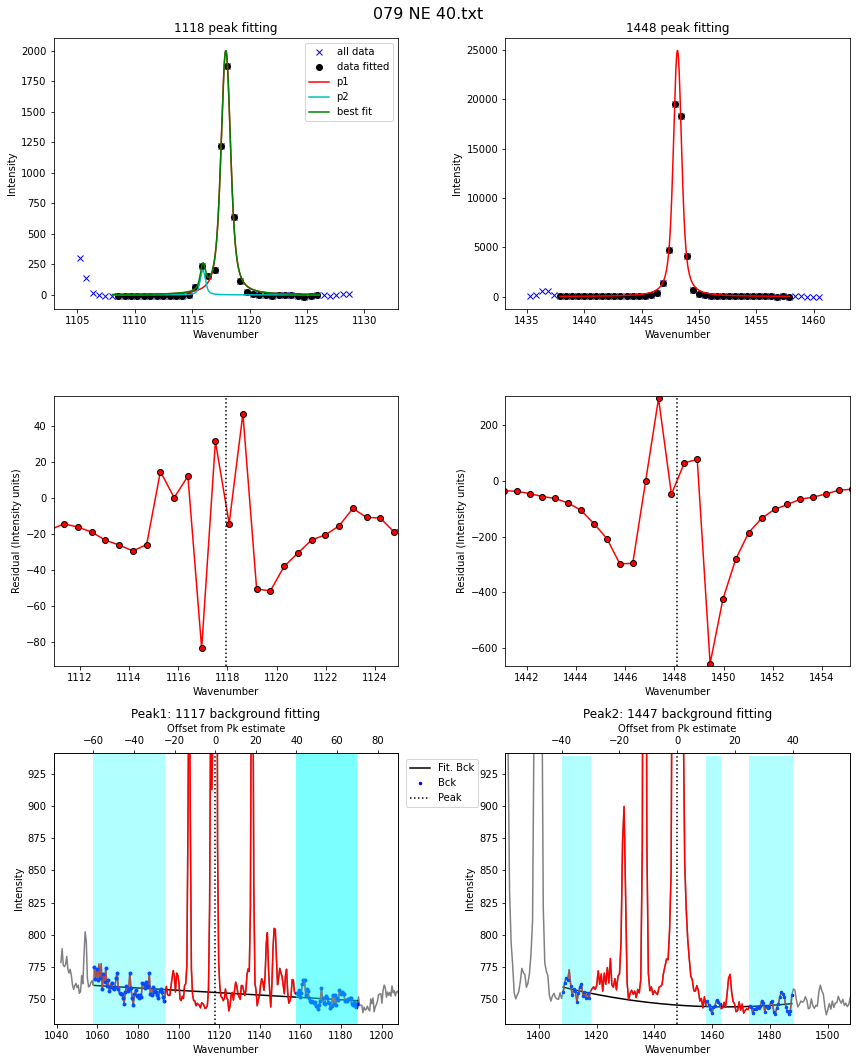

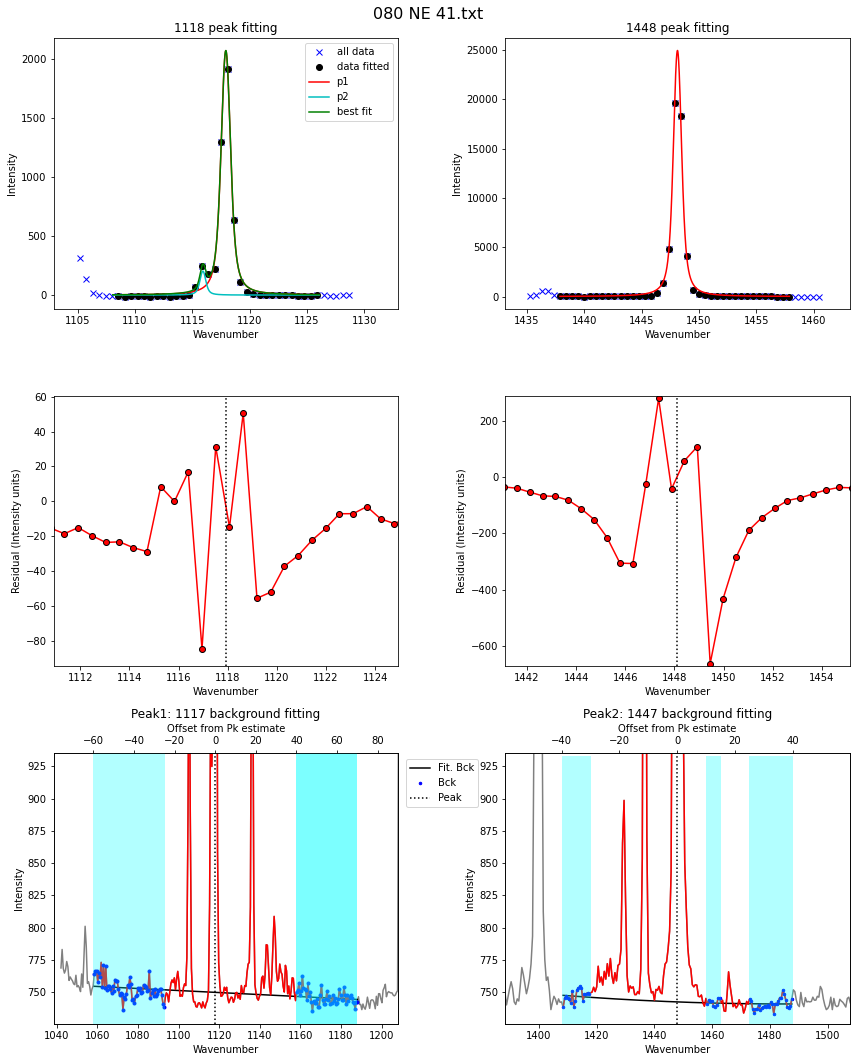

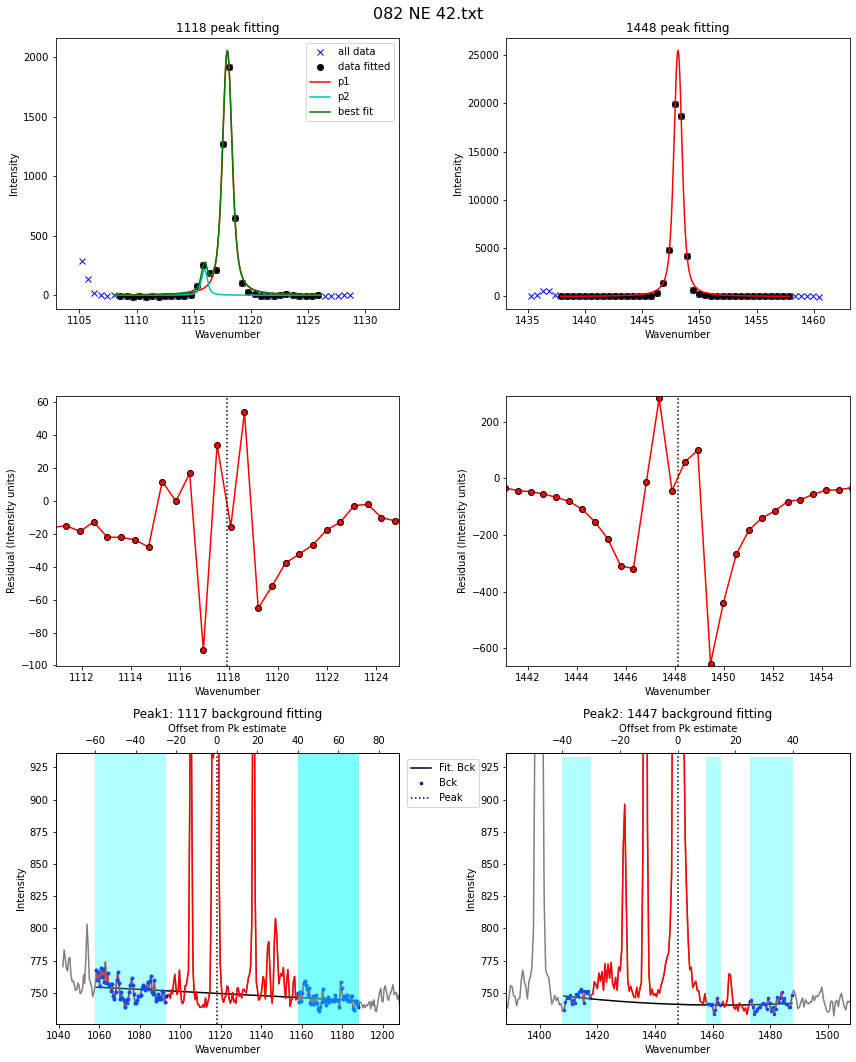

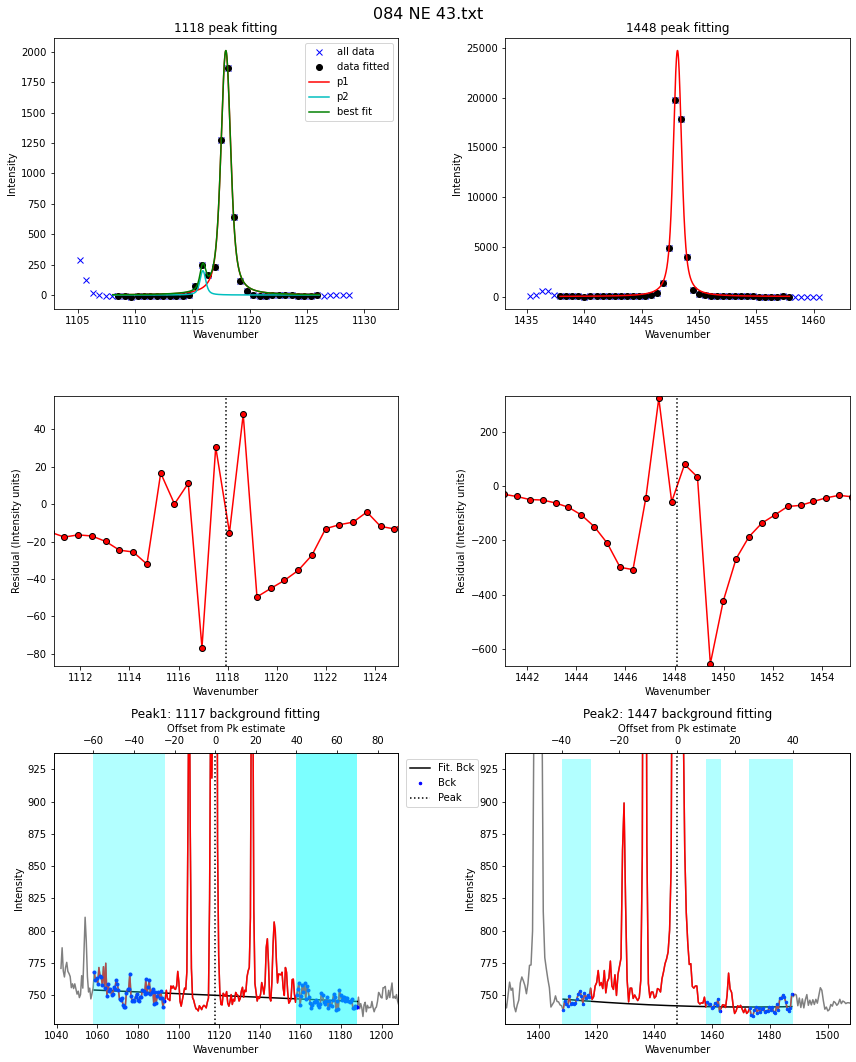

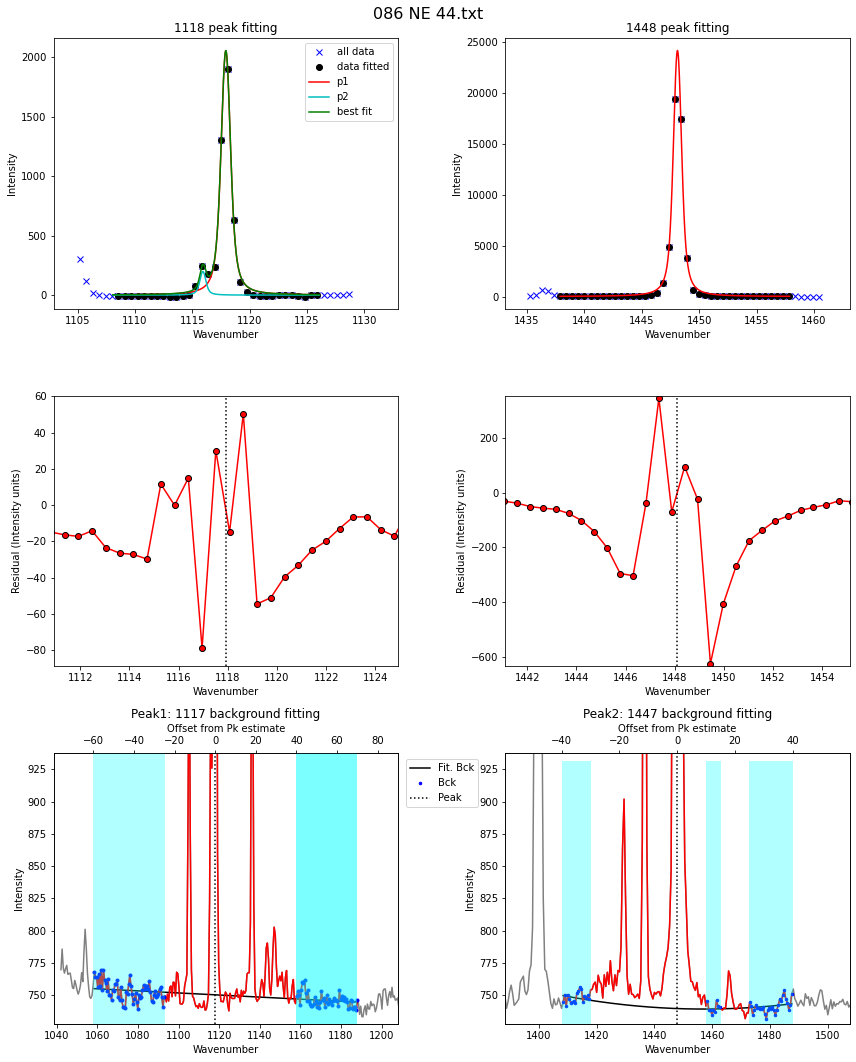

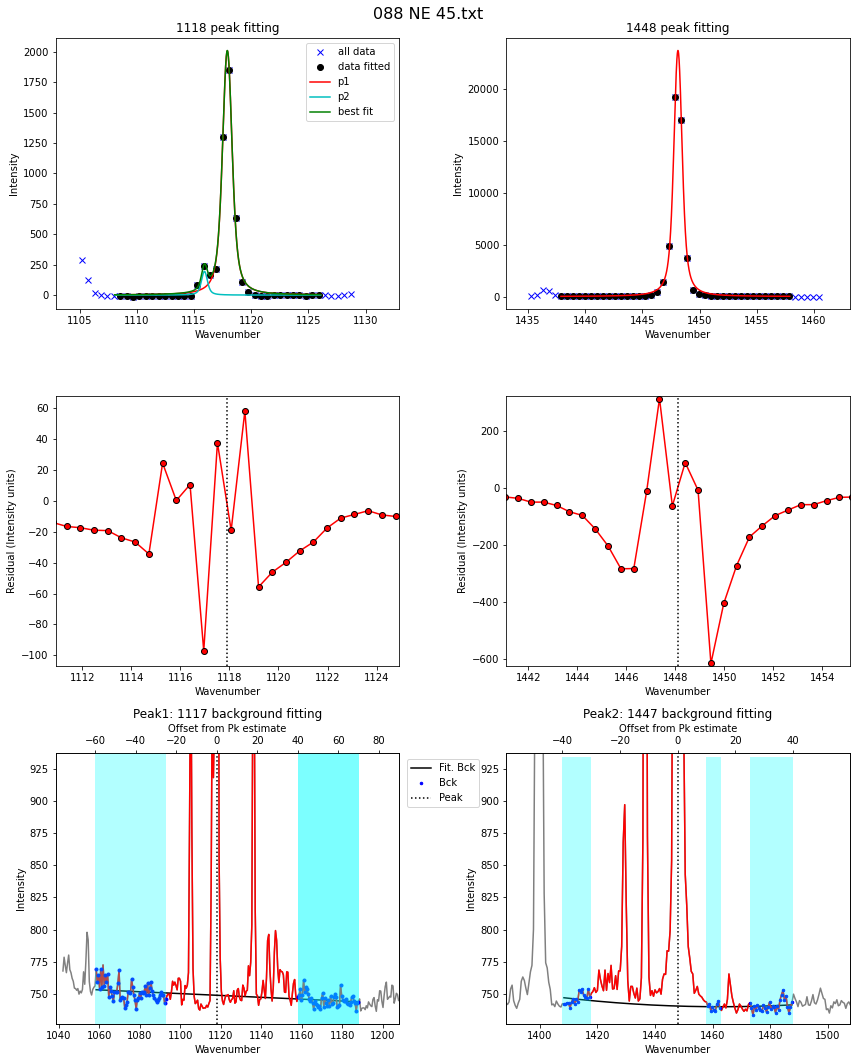

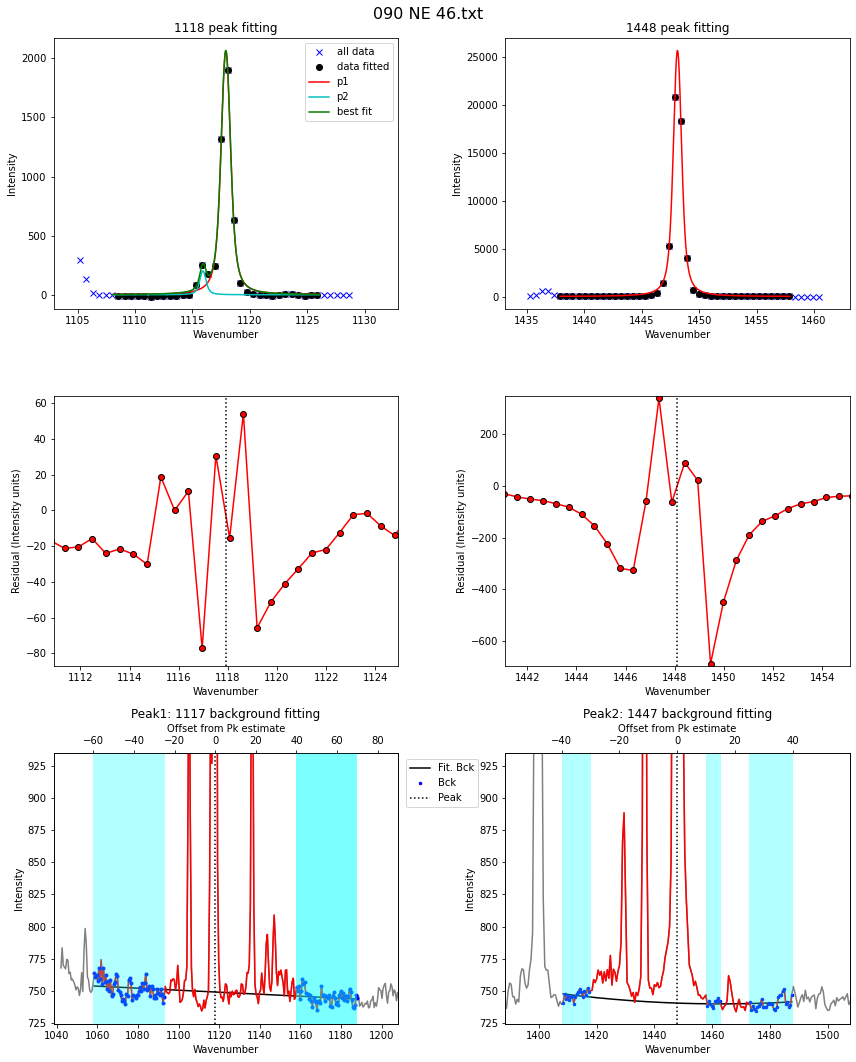

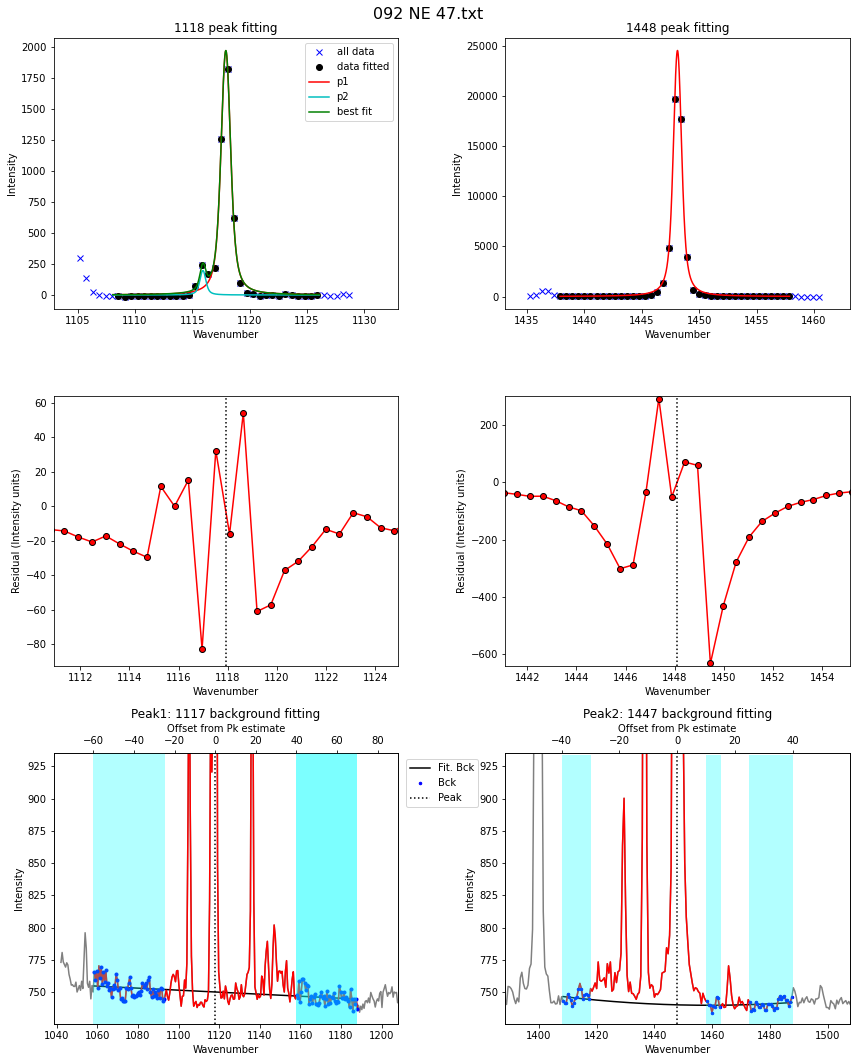

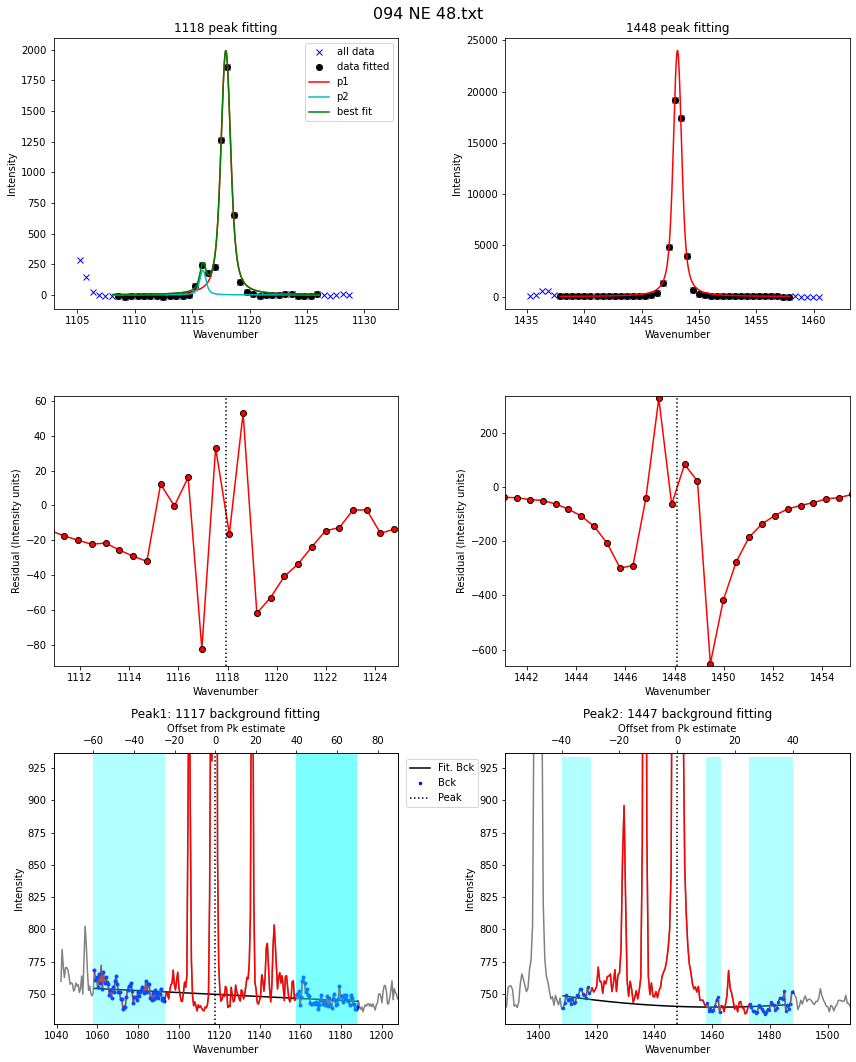

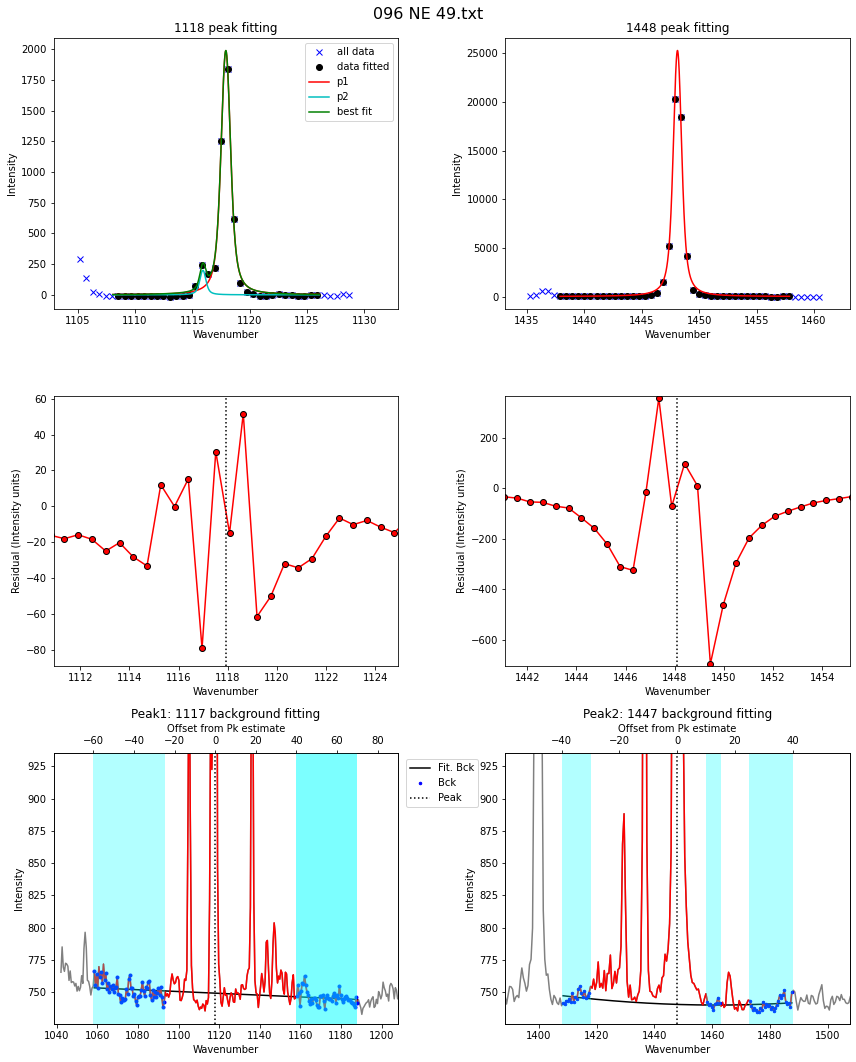

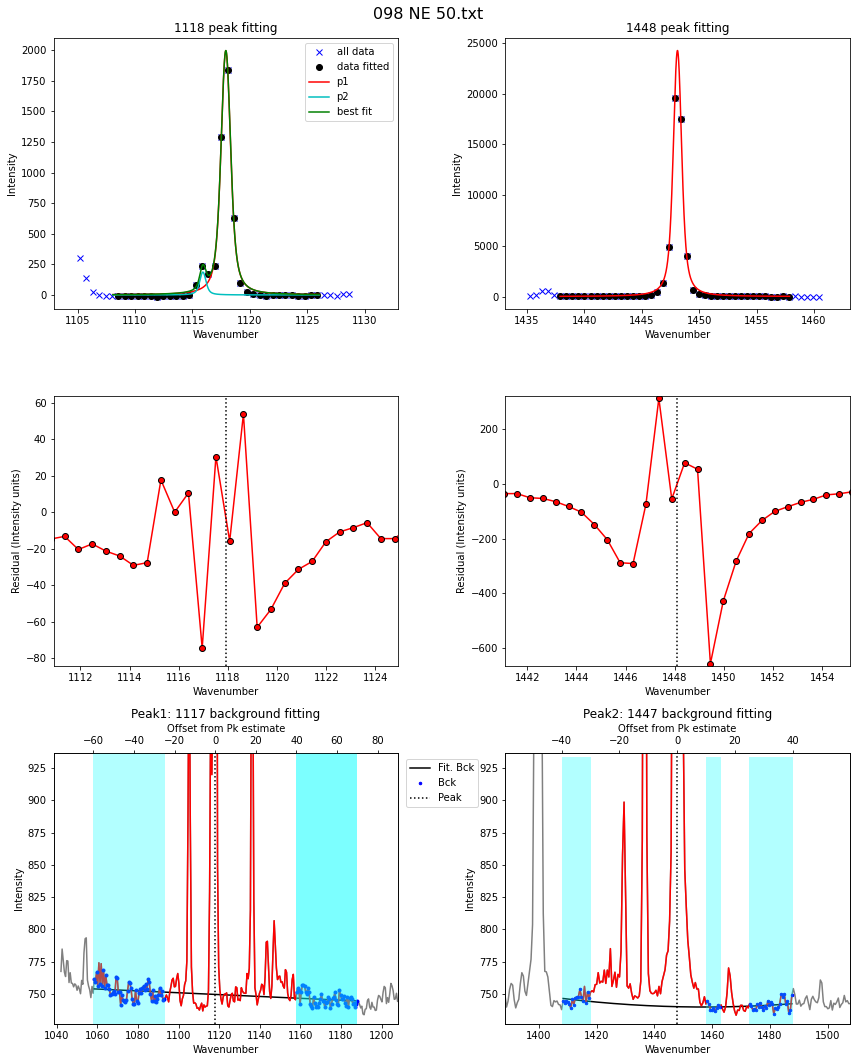

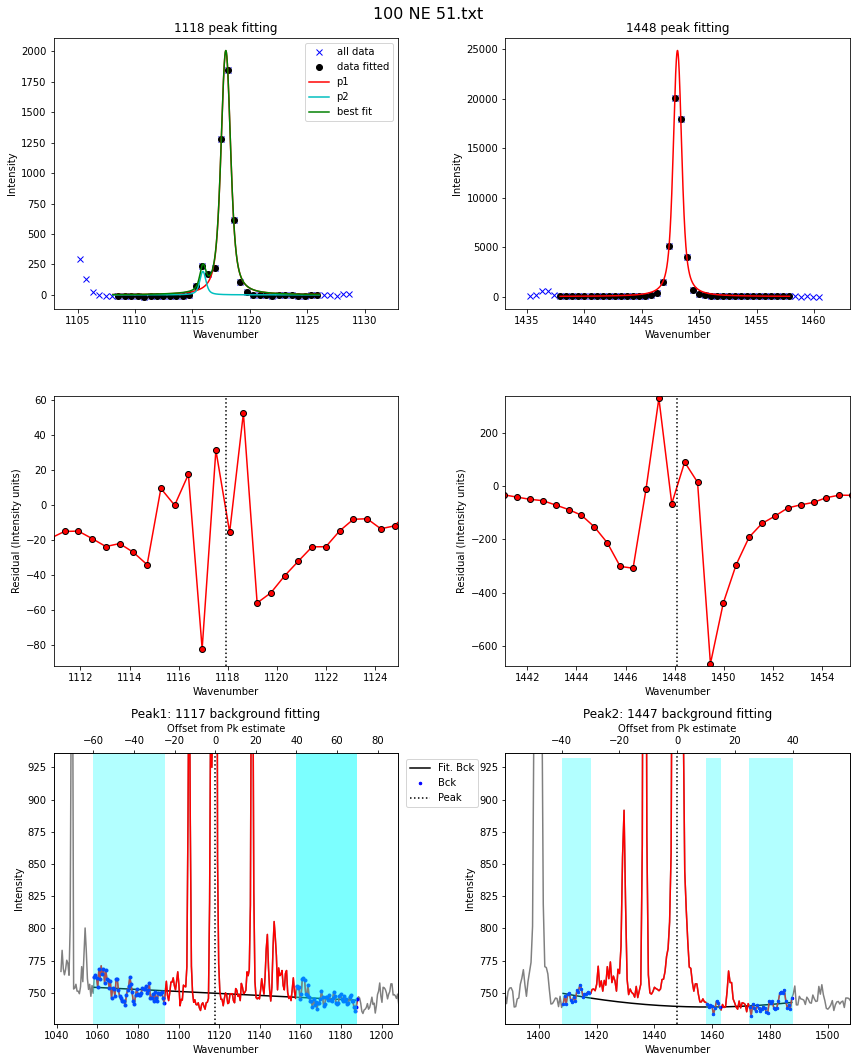

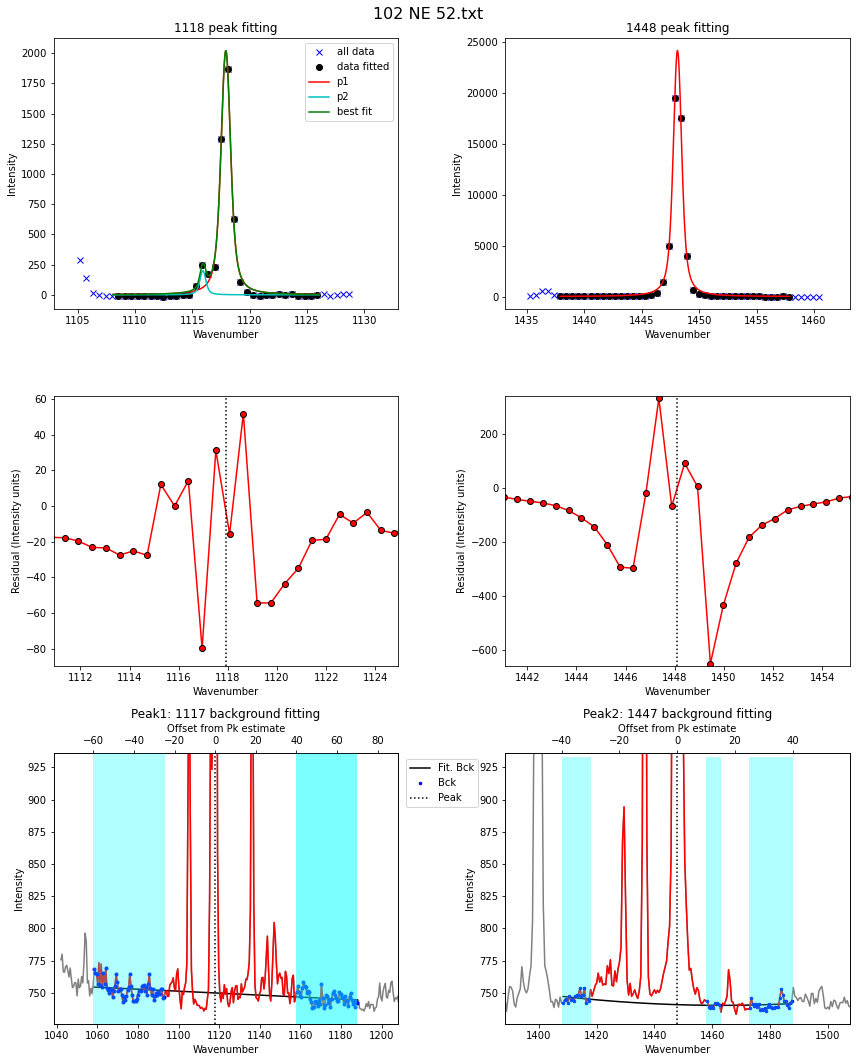

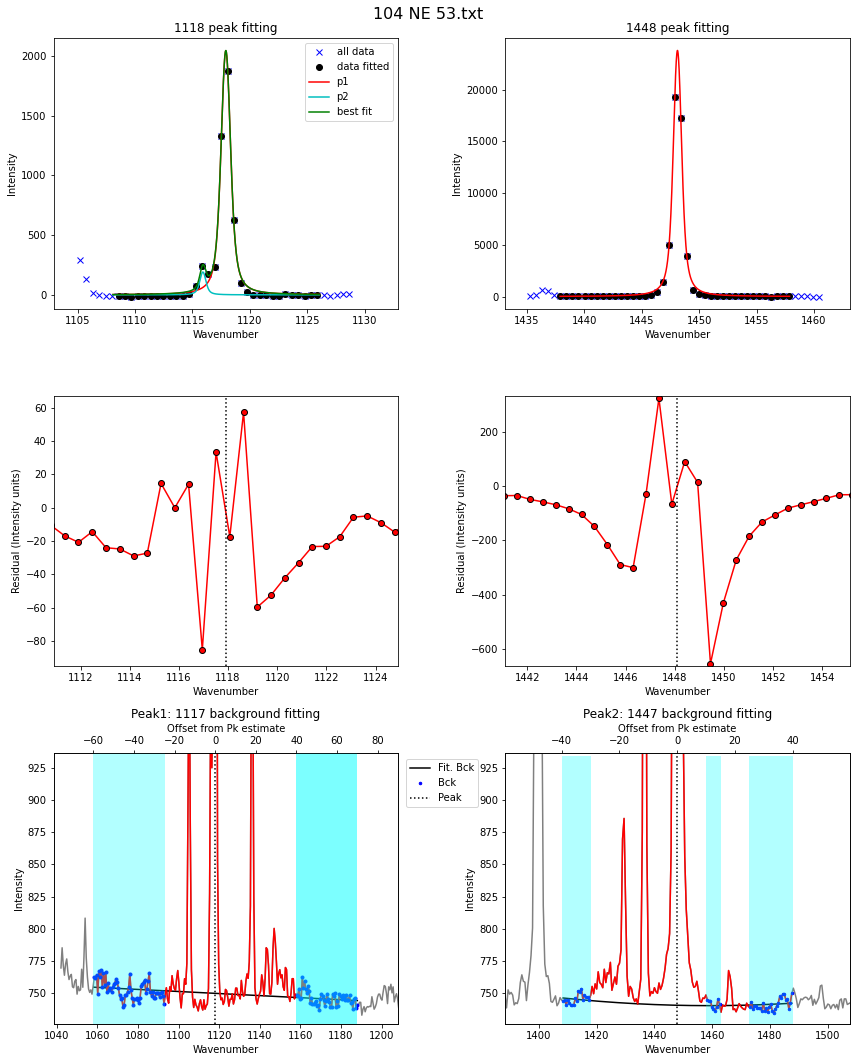

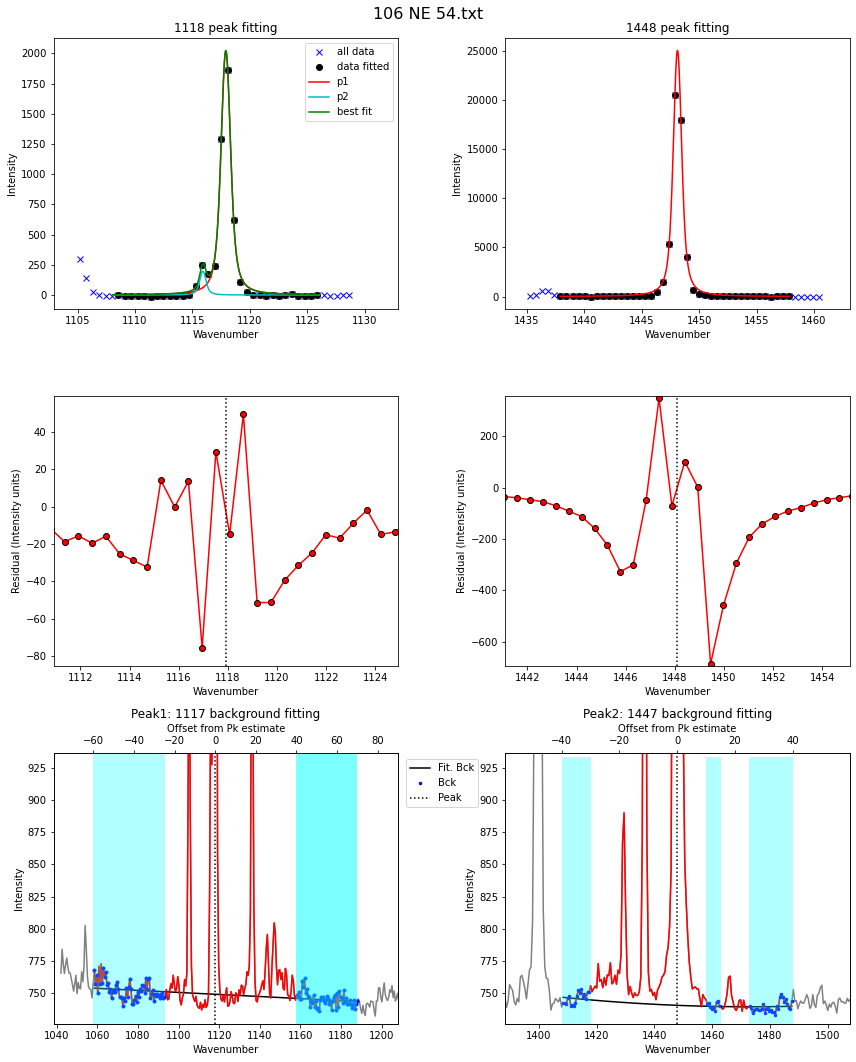

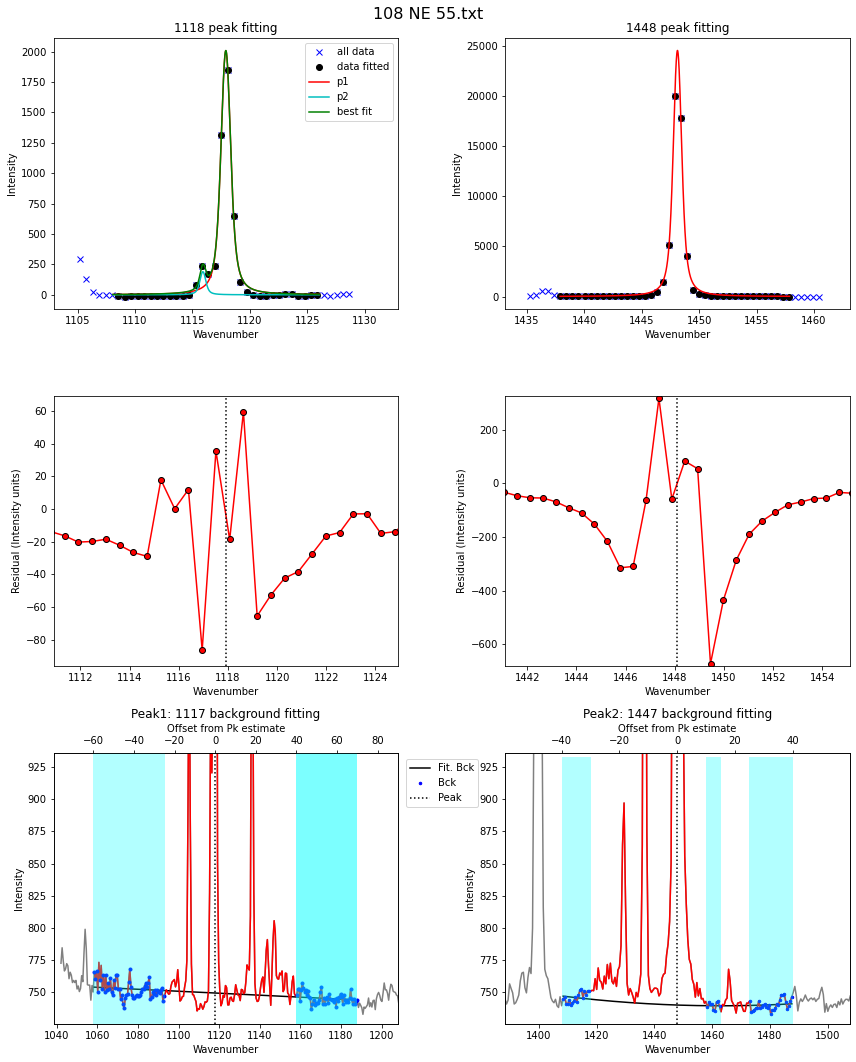

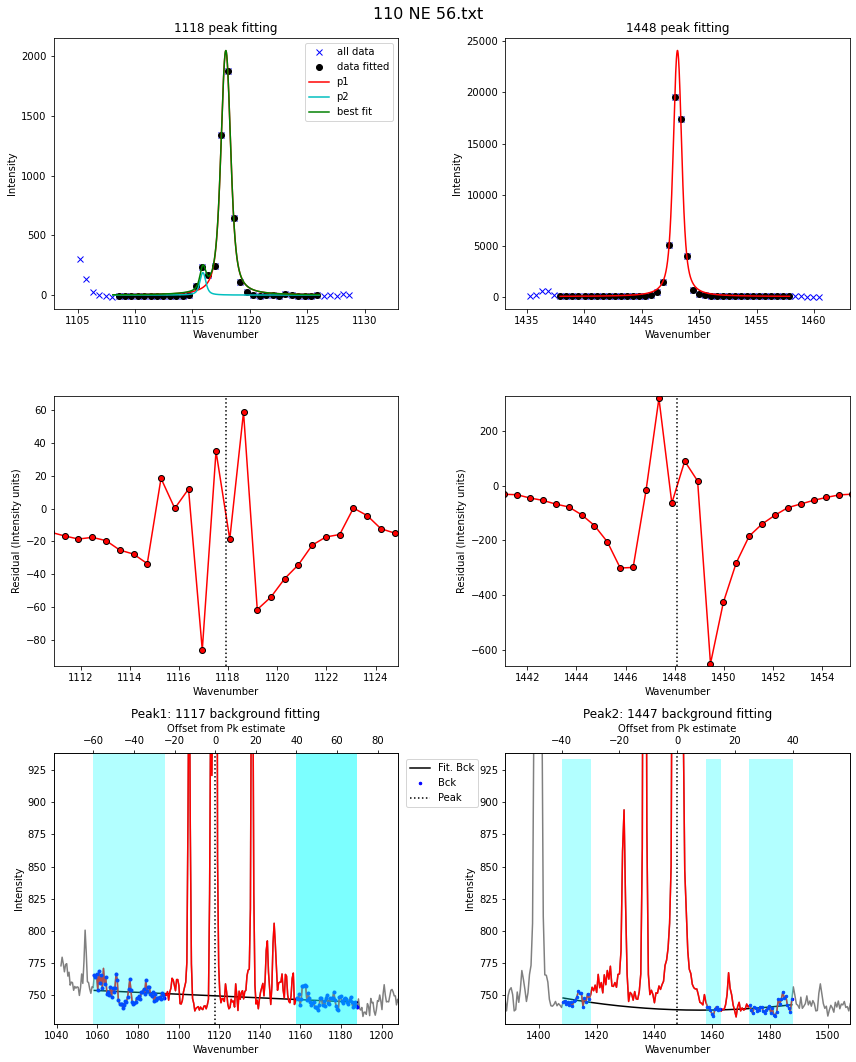

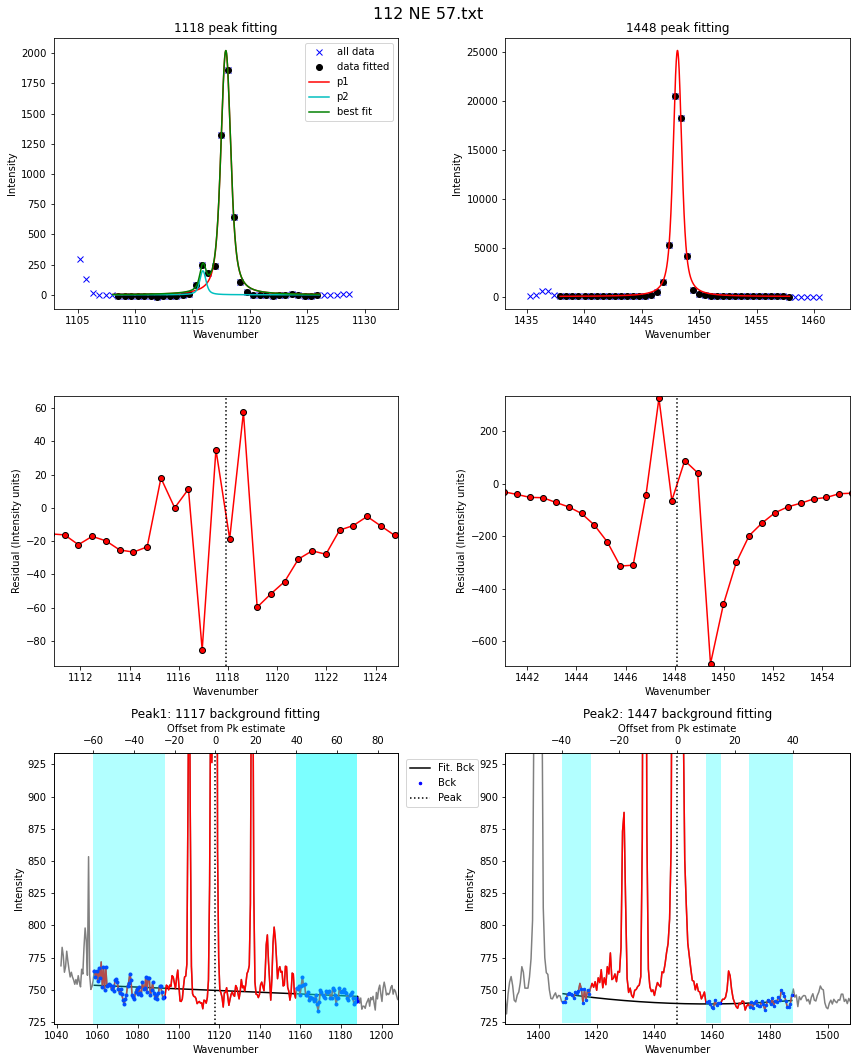

In [16]:
df2=pf.loop_Ne_lines(files=Ne_files, path=spectra_path, filetype=filetype,
                  config=Ne_Config, peaks_1=2, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [17]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=spectra_path, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [18]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

NE 1.txt


In [19]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')

file_m

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 28', 'NE 29',
       'NE 30', 'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 36',
       'NE 37', 'NE 38', 'NE 39', 'NE 40', 'NE 41', 'NE 42', 'NE 43',
       'NE 44', 'NE 45', 'NE 46', 'NE 47', 'NE 48', 'NE 49', 'NE 50',
       'NE 51', 'NE 52', 'NE 53', 'NE 54', 'NE 55', 'NE 56', 'NE 57',
       'NE 58', 'NE 59'], dtype=object)

In [20]:
type(file_m)

numpy.ndarray

In [21]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

063 NE 32.txt


In [22]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['NE 32', 'NE 34', 'NE 35', 'NE 36', 'NE 37', 'NE 38', 'NE 39',
       'NE 40', 'NE 41', 'NE 42', 'NE 43', 'NE 44', 'NE 45', 'NE 46',
       'NE 47', 'NE 48', 'NE 49', 'NE 50', 'NE 51', 'NE 52', 'NE 53',
       'NE 54', 'NE 55', 'NE 56', 'NE 57'], dtype=object)

## Now combining them

In [23]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [24]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



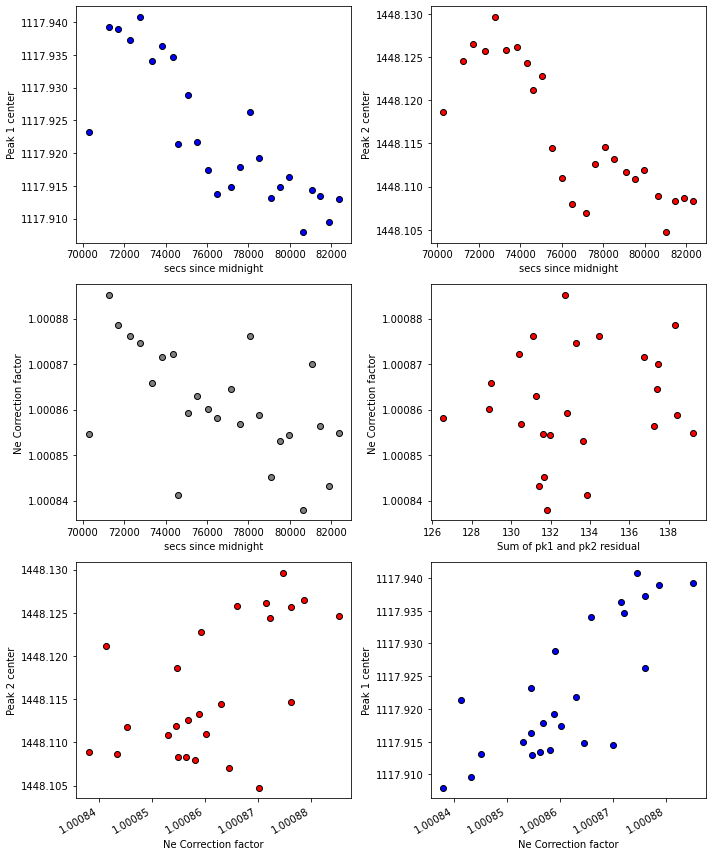

In [25]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

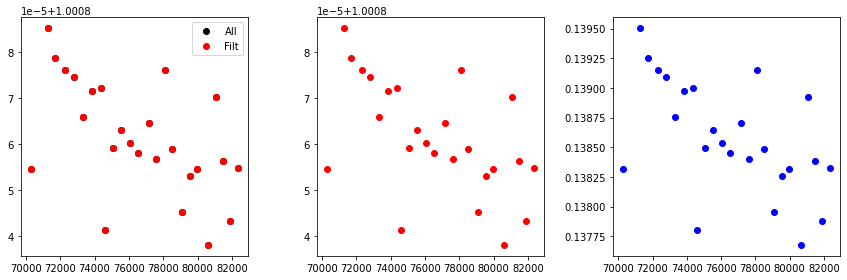

In [28]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0001)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')
fig.tight_layout()

In [29]:
df_combo.to_excel('Ne Lines Part 2 09.15.22.xlsx')

In [30]:
df_combo

filename_x  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0   063 NE 32.txt    1448.118645   28726.474069   0.235726   0.235726   
1   067 NE 34.txt    1448.124588   28848.942017   0.237068   0.237068   
2   069 NE 35.txt    1448.126493   29878.697976   0.236531   0.236531   
3   071 NE 36.txt    1448.125653   29551.022230   0.236924   0.236924   
4   073 NE 37.txt    1448.129615   29001.573606   0.236361   0.236361   
5   075 NE 38.txt    1448.125768   27781.470134   0.238311   0.238311   
6   077 NE 39.txt    1448.126170   29472.035727   0.237854   0.237854   
7   079 NE 40.txt    1448.124357   28457.001016   0.237843   0.237843   
8   080 NE 41.txt    1448.121170   28599.522557   0.239401   0.239401   
9   082 NE 42.txt    1448.122746   29035.448166   0.238077   0.238077   
10  084 NE 43.txt    1448.114433   28415.800437   0.239535   0.239535   
11  086 NE 44.txt    1448.111005   27877.001893   0.241048   0.241048   
12  088 NE 45.txt    1448.107993   27376.756928   0.241174   0.241174   
13  090 NE 46.txt    1448.107001   29645.822266   0.241031   0.241031   
14  092 NE 47.txt    1448.112650   28292.231145   0.240723   0.240723   
15  094 NE 48.txt    1448.114633   27830.399132   0.241933   0.241933   
16  096 NE 49.txt    1448.113240   29483.598399   0.243209   0.243209   
17  098 NE 50.txt    1448.111745   28151.560078   0.242107   0.242107   
18  100 NE 51.txt    1448.110867   28909.014177   0.242399   0.242399   
19  102 NE 52.txt    1448.111884   28166.866019   0.242979   0.242979   
20  104 NE 53.txt    1448.108912   27873.100089   0.244529   0.244529   
21  106 NE 54.txt    1448.104770   29344.622940   0.244502   0.244502   
22  108 NE 55.txt    1448.108325   28821.084370   0.245345   0.245345   
23  110 NE 56.txt    1448.108721   28181.771847   0.243870   0.243870   
24  112 NE 57.txt    1448.108317   29517.824435   0.245190   0.245190   

    error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  ...  \
0     0.00315    1117.923198    2520.819753   0.274651   0.274651  ...   
1     0.00315    1117.939227    2566.486316   0.272590   0.272590  ...   
2     0.00313    1117.938979    2679.507800   0.278510   0.278510  ...   
3     0.00308    1117.937319    2676.091024   0.275723   0.275723  ...   
4     0.00307    1117.940767    2794.387656   0.277297   0.277297  ...   
5     0.00311    1117.934056    2715.419733   0.277417   0.277417  ...   
6     0.00315    1117.936322    2639.111650   0.278630   0.278630  ...   
7     0.00315    1117.934713    2645.272812   0.275713   0.275713  ...   
8     0.00325    1117.921326    2715.985428   0.273766   0.273766  ...   
9     0.00315    1117.928805    2704.902185   0.275023   0.275023  ...   
10    0.00328    1117.921766    2690.406926   0.279466   0.279466  ...   
11    0.00333    1117.917414    2709.744774   0.275065   0.275065  ...   
12    0.00332    1117.913701    2680.984818   0.278562   0.278562  ...   
13    0.00340    1117.914839    2731.162479   0.276149   0.276149  ...   
14    0.00327    1117.917932    2613.156228   0.277019   0.277019  ...   
15    0.00339    1117.926287    2673.180323   0.280316   0.280316  ...   
16    0.00348    1117.919193    2624.869283   0.275628   0.275628  ...   
17    0.00337    1117.913198    2665.741003   0.279010   0.279010  ...   
18    0.00339    1117.914900    2647.158333   0.275597   0.275597  ...   
19    0.00342    1117.916409    2683.944153   0.277257   0.277257  ...   
20    0.00350    1117.907987    2713.931376   0.277041   0.277041  ...   
21    0.00355    1117.914436    2681.943377   0.276926   0.276926  ...   
22    0.00350    1117.913437    2705.477635   0.281415   0.281415  ...   
23    0.00344    1117.909548    2748.887330   0.280308   0.280308  ...   
24    0.00351    1117.912933    2728.218320   0.281932   0.281932  ...   

                    date  power (mW)  Int_time (s)  accumulations  Mag (X)  \
0   September 15, 2022\n       4.985          45.0            3.0    100.0   
1   September 15, 2022\n   

## Now lets make a regression against time

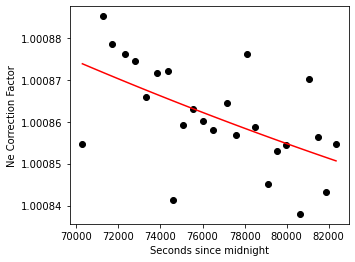

In [36]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [37]:
import pickle
with open('Ne_Line_Regression_09.15.22_part2.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [38]:
with open('Ne_Line_Regression_09.15.22_part2.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|